<a href="https://colab.research.google.com/github/rafsanalhad/machine_learning_jobsheet/blob/main/Week4_Praktikum%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi SVM Dengan Data **Dummy**

In [3]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

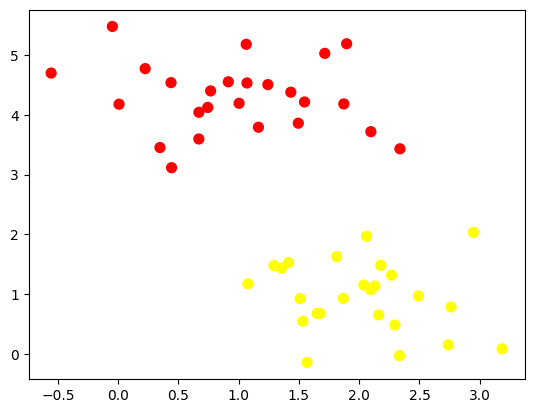

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Kode Penjelasan:

**Import make_blobs:**

Fungsi make_blobs dari scikit-learn digunakan untuk menghasilkan dataset berbentuk kluster-kluster. Dataset ini sering digunakan untuk latihan dalam masalah klasifikasi atau clustering.

Parameter make_blobs: **bold text**

n_samples=50: Dataset yang dihasilkan akan memiliki 50 sampel.

centers=2: Dataset ini akan dihasilkan dengan 2 kluster pusat.

random_state=0: Agar hasilnya dapat direproduksi, digunakan seed random (nomor 0 di sini).

cluster_std=0.60: Mengatur standar deviasi kluster (seberapa lebar sebaran kluster dari pusatnya).

**Output make_blobs:**

X: Matriks fitur dengan 50 baris dan 2 kolom (karena ini data 2D). Setiap baris mewakili satu titik (koordinat di ruang 2D).

y: Label untuk setiap titik dalam dataset, menunjuk apakah titik itu berada di kluster 1 atau kluster 2 (bernilai 0 atau 1).

Visualisasi dengan plt.scatter: **bold text**

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Fungsi scatter plot untuk memvisualisasikan dataset yang telah dibuat.

X[:, 0]: Mengambil koordinat x dari setiap titik.

X[:, 1]: Mengambil koordinat y dari setiap titik.

c=y: Menggunakan label kluster (y) untuk mewarnai setiap titik (dua kluster berbeda warna).

s=50: Mengatur ukuran setiap titik menjadi 50.

cmap='autumn': Menggunakan colormap 'autumn' yang memberikan warna berbeda untuk setiap kluster.

(-1.0, 3.5)

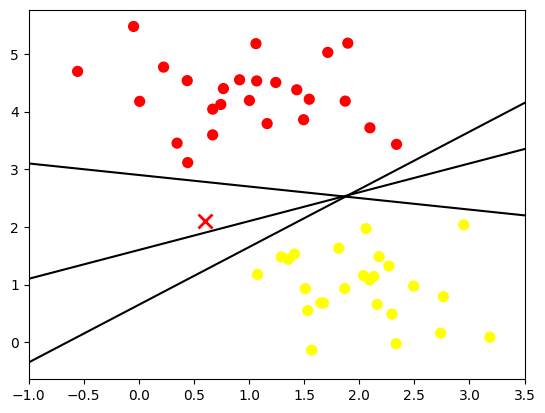

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

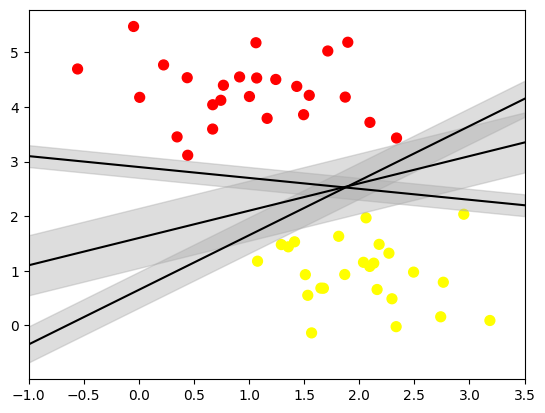

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

# Penjelasan
"xfit = np.linspace(-1, 3.5)"

np.linspace(-1, 3.5): Membuat sebuah array berisi nilai-nilai yang tersebar merata antara -1 dan 3.5. Array ini digunakan sebagai sumbu x untuk memplot beberapa garis lurus.
"plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')"

Fungsi ini memplot titik-titik dari dataset X, di mana setiap titik diberi warna sesuai label klasternya dalam y, dengan ukuran titik 50, dan menggunakan colormap autumn untuk mewarnai klaster-klaster tersebut.
"for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]"

Loop ini mengiterasi melalui tiga set nilai: m (kemiringan garis), b (intersep garis dengan sumbu y), dan d (margin deviasi atau ketidakpastian).
m: Kemiringan garis. b: Intersep, titik di mana garis memotong sumbu y. d: Margin yang digunakan untuk menambahkan bayangan di sekitar garis.

"yfit = m * xfit + b"

Menghitung nilai y untuk setiap nilai x dalam xfit berdasarkan persamaan garis lurus y = mx + b.
"m * xfit + b"

Persamaan garis lurus dengan kemiringan m dan intersep b.
"plt.plot(xfit, yfit, '-k')"

Memvisualisasikan garis lurus dengan warna hitam ('-k').
"plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)"

Mengisi area di antara dua garis berdasarkan nilai yfit - d dan yfit + d, yang menggambarkan margin di atas dan di bawah garis lurus:

xfit: Sumbu x.
yfit - d dan yfit + d: Batasan atas dan bawah pada sumbu y untuk menciptakan margin.
edgecolor='none': Area yang diisi tidak memiliki garis tepi.
color='#AAAAAA': Area yang diisi memiliki warna abu-abu.
alpha=0.4: Mengatur transparansi area yang diisi menjadi semi-transparan.
Ini menciptakan bayangan abu-abu di sekitar garis lurus, menandakan margin ketidakpastian atau deviasi.

"plt.xlim(-1, 3.5)"

Mengatur batasan pada sumbu x dari -1 hingga 3.5.

# Penerapan Fitting SVM

In [7]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [8]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

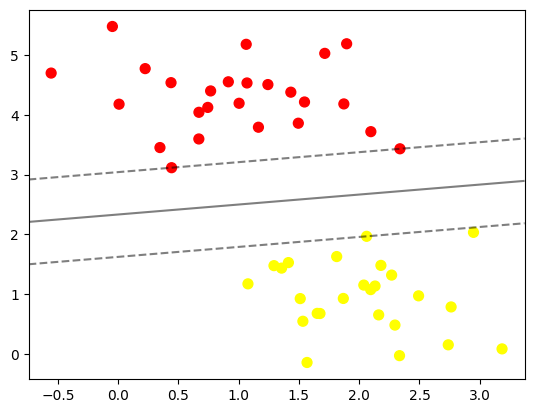

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [10]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting sangat penting dalam menentukan keberhasilan sebuah classifier, yang ditentukan oleh posisi support vector. Data lain yang berada jauh dari margin tetapi masih di sisi yang benar tidak dapat memengaruhi proses fitting karena bukan bagian dari support vector. Data-data ini juga tidak berperan dalam loss function yang digunakan selama fitting model. Untuk memahami konsep ini lebih lanjut, digunakan contoh perbandingan dengan 60 dan 120 data awal.

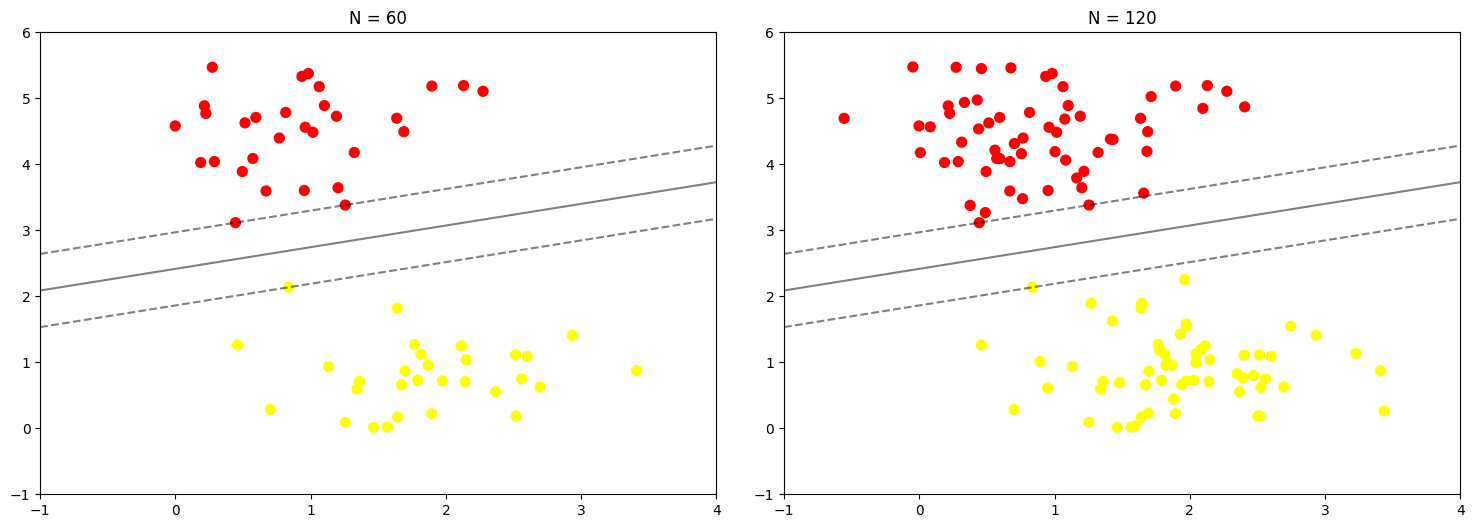

In [11]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


# Data Tidak Terpisah Secara Linier

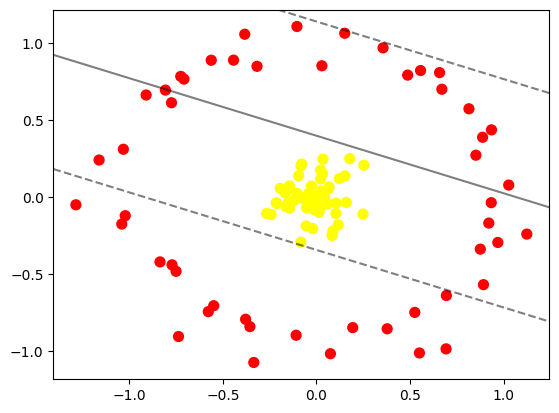

In [12]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ada garis pemisah linier yang dapat digunakan untuk memisahkan data secara efektif. Oleh karena itu, diperlukan sudut pandang atau proyeksi lain agar data dapat dipisahkan dengan lebih jelas. Dalam hal ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

In [13]:
r = np.exp(-(X ** 2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

In [14]:
from ipywidgets import interact, fixed

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.02119255e+00, -1.22635489e-01],
       [ 6.69917587e-01,  6.99063222e-01],
       [ 9.20650559e-01, -1.70521127e-01],
       [ 3.55734099e-01,  9.67962580e-01],
       [-2.12642919e-01, -4.27589500e-02],
       [ 6.57671327e-01,  8.07066925e-01],
       [-5.61995662e-01,  8.87585325e-01],
       [-3.55389321e-01, -8.43307644e-01],
       [ 2.22678328e-02,  1.16829591e-01],
       [-1.16081556e+00,  2.39234307e-01],
       [-1.50125113e-01, -3.89567937e-02],
       [ 8.14625519e-01,  5.72083399e-01],
       [-8.30141543e-02, -2.94176496e-01],
       [ 1.12362894e+00, -2.42200818e-01],
       [-3.17432281e-01,  8.48120568e-01],
       [ 1.93811582e-01, -8.49832624e-01],
       [ 9.68754760e-01, -2.96577743e-01],
       [ 4.41325378e-02, -2.84504500e-03],
       [-1.08518669e-01, -8.99320497e-01],
       [ 6.93913677e-01, -6.41508212e-01],
       [ 7.46425640e-02, -1.01942279e+00],
       [ 9.33631275e-01, -3.80095870e-02],
       [-2.66888058e-02,  7.00487924e-02],
       [-8.06638842e-01,  6.93558913e-01],
       [-5.48300118e-02, -1.89451198e-01],
       [-1.28486170e+00, -5.17965623e-02],
       [-1.63832680e-01, -6.23758997e-02],
       [-7.36797579e-01, -9.07662889e-01],
       [-7.27495957e-02, -1.12275702e-02],
       [-3.78302677e-01, -7.95530976e-01],
       [-5.34755539e-03, -3.85095518e-03],
       [-3.82854760e-01,  1.05646314e+00],
       [ 1.77894929e-01,  2.48079188e-01],
       [-7.71178458e-01, -4.41810515e-01],
       [ 6.92398963e-01, -9.87924420e-01],
       [ 2.49422911e-02,  3.71490715e-02],
       [-1.43900249e-01, -7.27022914e-02],
       [ 1.16622894e-01, -1.82427975e-01],
       [-1.02586766e-01,  2.10858415e-02],
       [-8.35531182e-01, -4.22839421e-01],
       [ 8.33602479e-02, -2.50936516e-01],
       [ 1.04821544e-01, -4.08941460e-02],
       [-1.97743458e-02, -2.06437374e-01],
       [-2.65783159e-01, -1.08217595e-01],
       [ 8.51545287e-01,  2.70583092e-01],
       [-4.21033037e-02,  2.15842933e-02],
       [-1.03979922e+00, -1.76909988e-01],
       [ 2.91094232e-02,  8.51467080e-01],
       [ 5.25354433e-01, -7.50790278e-01],
       [ 1.02705582e+00,  7.64176962e-02],
       [-7.24708526e-01,  7.82568491e-01],
       [ 1.40629534e-02, -1.00552549e-01],
       [ 8.92128009e-01, -5.70799010e-01],
       [ 2.53269107e-01,  2.05547486e-01],
       [ 6.48049055e-02,  5.28567423e-02],
       [ 3.49606475e-02,  2.44517186e-01],
       [ 1.59546501e-01, -3.60297998e-02],
       [-2.80300790e-02, -5.06749808e-02],
       [ 8.87586534e-01,  3.87011868e-01],
       [ 5.50008631e-01, -1.01453988e+00],
       [-1.20260121e-01, -2.32166273e-02],
       [-9.48377129e-02,  1.37446291e-01],
       [ 4.87252013e-01,  7.90888280e-01],
       [-1.04124675e-01,  1.10687122e+00],
       [-5.48595189e-01, -7.07598264e-01],
       [-1.03135229e+00,  3.09137641e-01],
       [ 9.34961481e-01,  4.35096041e-01],
       [ 8.82690848e-02, -2.22077469e-01],
       [ 1.94935049e-02, -6.54043856e-02],
       [-2.42362644e-01, -1.15255211e-01],
       [-8.21541717e-02,  2.03159188e-01],
       [ 8.75322251e-01, -3.39853910e-01],
       [-2.15041723e-01, -3.88606085e-02],
       [-9.41178743e-03, -8.54120799e-02],
       [ 1.52681333e-01,  1.36075951e-01],
       [ 5.56192820e-01,  8.20591630e-01],
       [-4.42837107e-01,  8.87962584e-01],
       [-1.44472954e-01,  7.03427848e-02],
       [-5.18633705e-02, -7.10954720e-02],
       [-7.07637011e-01,  7.64930380e-01],
       [-5.77582739e-01, -7.45916873e-01],
       [ 5.90276406e-02, -4.53891137e-02],
       [-3.34590474e-01, -1.07631893e+00],
       [ 1.22808026e-01,  1.18695201e-01],
       [ 3.23605304e-02,  1.51211930e-01],
       [-9.09623709e-01,  6.61570577e-01],
       [ 1.51143139e-01,  1.06276256e+00],
       [-1.67019029e-01,  2.47381215e-02],
       [ 1.03781978e-01, -1.07816239e-01],
       [-7.74237919e-01,  6.11300237e-01],
       [ 6.71381712e-02,  6.43328828e-02],
       [ 2.48634843e-01, -1.11954615e-01

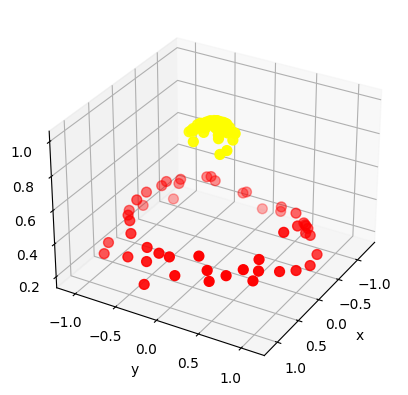

In [15]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

Meskipun data dapat dipisahkan, memproyeksikan N titik data ke dalam dimensi N meningkatkan beban komputasi. Untuk mengatasi masalah ini, digunakan kernel Radial Basis Function (RBF) yang tersedia di Scikit-Learn.

In [16]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

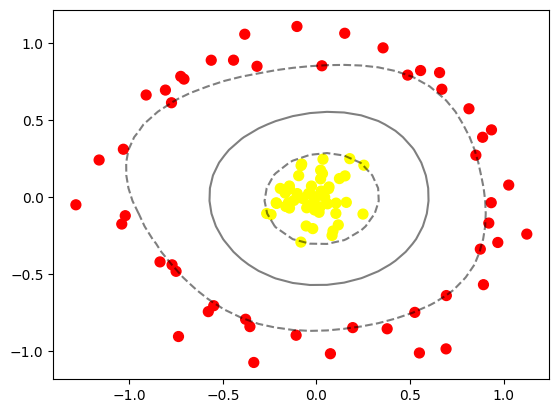

In [17]:

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')


# Data Overlap

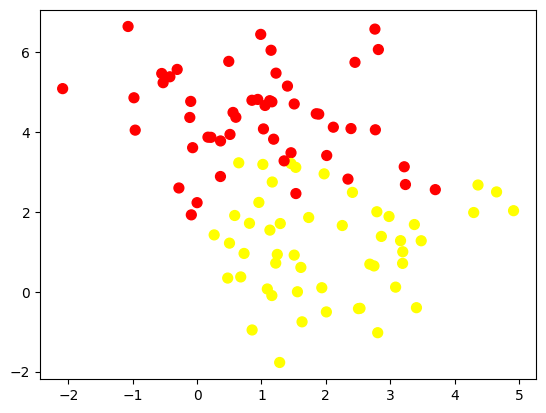

In [18]:

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Untuk mengatasi masalah ini, dapat diterapkan teknik margin smoothing pada SVM. Teknik ini memungkinkan beberapa titik data masuk ke dalam margin, sehingga menghasilkan fitting yang lebih optimal. Ketebalan margin yang dihasilkan dari teknik smoothing ini diatur oleh parameter tuning yang disebut C. Contoh di bawah menunjukkan bagaimana perubahan nilai C memengaruhi hasil akhir dari fitting.

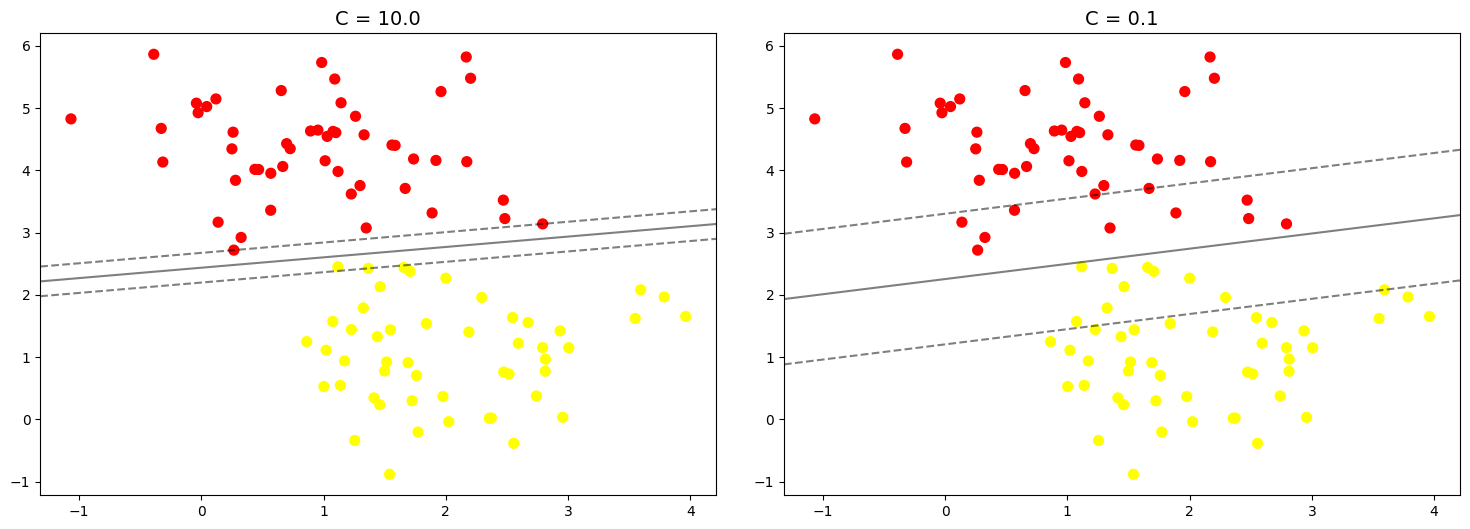

In [19]:

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)